<a href="https://colab.research.google.com/github/nowshaba/Intrusion-Detection/blob/main/SSDP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn
import sklearn.metrics as m
import keras
import tensorflow as tf
import sklearn
import tensorboard

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
#Avoid warnings
import warnings
warnings.filterwarnings('ignore')
#Settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#Import  Data
j=0
n=0
#to check whih files have both attack and normal labels
for j in range(0,163):
  df3=pd.read_csv("/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/11.SSDP/SSDP_"+str(j)+".csv")
  j+1
  for i in df3['Label']:
    if (i=='SSDP'):
      n=1
  if (n==1):
    print("n is",n, "and j is",j)

n is 1 and j is 23
n is 1 and j is 24
n is 1 and j is 25
n is 1 and j is 26
n is 1 and j is 27
n is 1 and j is 28
n is 1 and j is 29
n is 1 and j is 30
n is 1 and j is 31
n is 1 and j is 32
n is 1 and j is 33
n is 1 and j is 34
n is 1 and j is 35
n is 1 and j is 36
n is 1 and j is 37
n is 1 and j is 38
n is 1 and j is 39
n is 1 and j is 40
n is 1 and j is 41
n is 1 and j is 42
n is 1 and j is 43
n is 1 and j is 44
n is 1 and j is 45
n is 1 and j is 46
n is 1 and j is 47
n is 1 and j is 48
n is 1 and j is 49
n is 1 and j is 50
n is 1 and j is 51
n is 1 and j is 52
n is 1 and j is 53
n is 1 and j is 54
n is 1 and j is 55
n is 1 and j is 56
n is 1 and j is 57
n is 1 and j is 58
n is 1 and j is 59
n is 1 and j is 60
n is 1 and j is 61
n is 1 and j is 62
n is 1 and j is 63
n is 1 and j is 64
n is 1 and j is 65
n is 1 and j is 66
n is 1 and j is 67
n is 1 and j is 68
n is 1 and j is 69
n is 1 and j is 70
n is 1 and j is 71
n is 1 and j is 72
n is 1 and j is 73
n is 1 and j is 74
n is 1 and j

In [ ]:
#much better than this is to put all the desired csv files in this case from 21 to 32 in one folder and use GLOB to put them in one df
df1 = pd.concat(
    map(pd.read_csv,["/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/11.SSDP/SSDP_23.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/11.SSDP/SSDP_24.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/11.SSDP/SSDP_25.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/11.SSDP/SSDP_26.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/11.SSDP/SSDP_27.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/11.SSDP/SSDP_28.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/11.SSDP/SSDP_29.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/11.SSDP/SSDP_30.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/11.SSDP/SSDP_31.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/11.SSDP/SSDP_32.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/11.SSDP/SSDP_33.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/11.SSDP/SSDP_34.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/11.SSDP/SSDP_35.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/11.SSDP/SSDP_36.csv"]), ignore_index=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/reshape/concat.py:304: DtypeWarning: Columns (34,58,71,73,77,78,79,80,82,84,85,86,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,115,116,117,118,166,167,168,172,178,180,181,183,184,185,189,190,193,195,196,197,200,201,202,203,204,205,206,213,215,217,218,219,247,248,249,250,251) have mixed types.Specify dtype option on import or set low_memory=False.
  sort=sort,
/usr/local/lib/python3.7/dist-packages/pandas/core/reshape/concat.py:304: DtypeWarning: Columns (23,24,48,50,51,71,73,77,78,79,80,82,84,85,87,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,118,166,167,168,178,180,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,249) have mixed types.Specify dtype option on import or set low_memory=False.
  sort=sort,
/usr/local/lib/python3.7/dist-packages/pandas/core/reshape/concat.py:304: DtypeWarning: Columns (34,58,71,73,77,78,79,80,82,84,85,86,87,90,

In [ ]:
drop_cols = []
for i in df1.columns:
    if len(df1[i].unique())==1:
        drop_cols.append(i)
print("Total columns with only 1 unique value:", len(drop_cols))
df1.drop(drop_cols, 1, inplace=True)

print(df1.columns)
df1.replace([np.inf, -np.inf], 0, inplace=True)
df1.fillna(0, inplace = True)

Total columns with only 1 unique value: 73


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


Index(['frame.encap_type', 'frame.len', 'frame.number', 'frame.time',
       'frame.time_delta', 'frame.time_delta_displayed', 'frame.time_epoch',
       'frame.time_relative', 'radiotap.channel.flags.cck',
       'radiotap.channel.flags.ofdm',
       ...
       'tls.alert_message.level', 'tls.app_data_proto',
       'tls.compress_certificate.compressed_certificate_message.length',
       'tls.handshake.extension.type',
       'tls.handshake.extensions_key_share_group',
       'tls.handshake.session_ticket_length', 'tls.handshake.version',
       'tls.record.content_type', 'tls.record.version', 'Label'],
      dtype='object', length=181)


In [ ]:
df1.dropna(1,inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700130 entries, 0 to 700129
Columns: 181 entries, frame.encap_type to Label
dtypes: float64(68), object(113)
memory usage: 966.8+ MB


In [ ]:
#much better than this is to put all the desired csv files in this case from 21 to 32 in one folder and use GLOB to put them in one df
df2 = pd.concat(
    map(pd.read_csv,["/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/11.SSDP/SSDP_37.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/11.SSDP/SSDP_38.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/11.SSDP/SSDP_39.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/11.SSDP/SSDP_40.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/11.SSDP/SSDP_41.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/11.SSDP/SSDP_42.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/11.SSDP/SSDP_43.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/11.SSDP/SSDP_44.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/11.SSDP/SSDP_45.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/11.SSDP/SSDP_46.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/11.SSDP/SSDP_47.csv"]), ignore_index=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/reshape/concat.py:304: DtypeWarning: Columns (23,24,48,50,51,71,73,77,78,79,80,82,84,85,86,90,91,92,98,99,100,101,102,103,104,105,107,108,109,110,111,118,153,158,159,160,161,166,167,168,183,184,185,190,192,193,194,197,203,204,205,209,210,211,212,213,215,217,247,248,250,251) have mixed types.Specify dtype option on import or set low_memory=False.
  sort=sort,
/usr/local/lib/python3.7/dist-packages/pandas/core/reshape/concat.py:304: DtypeWarning: Columns (23,24,48,50,51,82,84,85,86,90,91,92,93,98,99,100,101,102,103,104,105,107,108,109,110,111,118,166,167,168,178,180,183,184,185,190,192,193,194,197,209,210,211,212,213,217,244,247,248,250,251,252) have mixed types.Specify dtype option on import or set low_memory=False.
  sort=sort,
/usr/local/lib/python3.7/dist-packages/pandas/core/reshape/concat.py:304: DtypeWarning: Columns (23,24,48,50,51,71,73,77,78,79,80,82,84,85,86,90,91,92,98,99,100,101,102,103,104,105,107,108,109,110,111,118,122,15

In [ ]:
drop_cols = []
for i in df2.columns:
    if len(df2[i].unique())==1:
        drop_cols.append(i)
print("Total columns with only 1 unique value:", len(drop_cols))
df2.drop(drop_cols, 1, inplace=True)

print(df2.columns)
df2.replace([np.inf, -np.inf], 0, inplace=True)
df2.fillna(0, inplace = True)

Total columns with only 1 unique value: 77


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


Index(['frame.len', 'frame.number', 'frame.time', 'frame.time_delta',
       'frame.time_delta_displayed', 'frame.time_epoch', 'frame.time_relative',
       'radiotap.datarate', 'radiotap.dbm_antsignal', 'radiotap.length',
       ...
       'tls.alert_message.desc', 'tls.alert_message.level',
       'tls.app_data_proto', 'tls.handshake.extension.type',
       'tls.handshake.extensions_key_share_group',
       'tls.handshake.session_ticket_length', 'tls.handshake.version',
       'tls.record.content_type', 'tls.record.version', 'Label'],
      dtype='object', length=177)


In [ ]:
df2.dropna(1,inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550000 entries, 0 to 549999
Columns: 177 entries, frame.len to Label
dtypes: float64(49), int64(18), object(110)
memory usage: 742.7+ MB


In [ ]:
#much better than this is to put all the desired csv files in this case from 21 to 32 in one folder and use GLOB to put them in one df
df3 = pd.concat(
    map(pd.read_csv,["/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/11.SSDP/SSDP_48.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/11.SSDP/SSDP_49.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/11.SSDP/SSDP_50.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/11.SSDP/SSDP_51.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/11.SSDP/SSDP_52.csv"]), ignore_index=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/reshape/concat.py:304: DtypeWarning: Columns (23,24,48,50,51,71,73,77,78,79,80,82,84,85,86,90,91,92,98,99,100,101,102,103,104,105,107,108,109,110,111,112,113,114,116,117,118,120,136,137,138,141,143,145,146,148,149,151,153,158,159,160,161,166,167,168,169,170,171,172,173,174,175,176,177,178,180,181,183,184,185,190,192,194,203,204,205,209,210,211,212,213,217,247,248,250,251) have mixed types.Specify dtype option on import or set low_memory=False.
  sort=sort,
/usr/local/lib/python3.7/dist-packages/pandas/core/reshape/concat.py:304: DtypeWarning: Columns (23,24,48,50,51,86,105,118,120,137,139,141,142,146,148,149,151,166,167,168,172,178,180,181,183,184,185,190,192,193,194,197,203,204,205,209,210,211,212,213,217,218,219,247,248,249,250,251) have mixed types.Specify dtype option on import or set low_memory=False.
  sort=sort,
/usr/local/lib/python3.7/dist-packages/pandas/core/reshape/concat.py:304: DtypeWarning: Columns (23,24,48,50,51,71,73,

In [ ]:
drop_cols = []
for i in df3.columns:
    if len(df3[i].unique())==1:
        drop_cols.append(i)
print("Total columns with only 1 unique value:", len(drop_cols))
df3.drop(drop_cols, 1, inplace=True)

print(df3.columns)
df3.replace([np.inf, -np.inf], 0, inplace=True)
df3.fillna(0, inplace = True)

Total columns with only 1 unique value: 80


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


Index(['frame.len', 'frame.number', 'frame.time', 'frame.time_delta',
       'frame.time_delta_displayed', 'frame.time_epoch', 'frame.time_relative',
       'radiotap.datarate', 'radiotap.dbm_antsignal', 'radiotap.length',
       ...
       'tls.alert_message.desc', 'tls.alert_message.level',
       'tls.app_data_proto', 'tls.handshake.extension.type',
       'tls.handshake.extensions_key_share_group',
       'tls.handshake.session_ticket_length', 'tls.handshake.version',
       'tls.record.content_type', 'tls.record.version', 'Label'],
      dtype='object', length=174)


In [ ]:
df3.dropna(1,inplace=True)
df3.info()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  """Entry point for launching an IPython kernel.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Columns: 174 entries, frame.len to Label
dtypes: float64(36), int64(18), object(120)
memory usage: 331.9+ MB


In [ ]:
#much better than this is to put all the desired csv files in this case from 21 to 32 in one folder and use GLOB to put them in one df
df4 = pd.concat(
    map(pd.read_csv,["/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/11.SSDP/SSDP_53.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/11.SSDP/SSDP_54.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/11.SSDP/SSDP_55.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/11.SSDP/SSDP_56.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/11.SSDP/SSDP_57.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/11.SSDP/SSDP_58.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/11.SSDP/SSDP_59.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/11.SSDP/SSDP_60.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/11.SSDP/SSDP_61.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/11.SSDP/SSDP_62.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/11.SSDP/SSDP_63.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/11.SSDP/SSDP_64.csv"]), ignore_index=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/reshape/concat.py:304: DtypeWarning: Columns (23,24,48,50,51,86,105,118,120,137,139,146,148,149,151,153,158,159,160,161,166,167,168,178,180,183,184,185,190,192,193,194,197,203,204,205,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types.Specify dtype option on import or set low_memory=False.
  sort=sort,
/usr/local/lib/python3.7/dist-packages/pandas/core/reshape/concat.py:304: DtypeWarning: Columns (23,24,48,50,51,71,73,77,78,79,80,82,84,85,86,112,113,114,116,117,118,120,137,141,146,148,149,151,153,158,159,160,161,166,167,168,169,170,171,172,173,174,175,176,177,178,180,181,183,184,185,190,192,193,194,197,203,204,205,209,210,211,212,213,215,217,218,219,247,248,249,250) have mixed types.Specify dtype option on import or set low_memory=False.
  sort=sort,
/usr/local/lib/python3.7/dist-packages/pandas/core/reshape/concat.py:304: DtypeWarning: Columns (23,24,48,50,51,118,120,136,137,138,141,143,145,146,148,149,151,153,1

In [ ]:
drop_cols = []
for i in df4.columns:
    if len(df4[i].unique())==1:
        drop_cols.append(i)
print("Total columns with only 1 unique value:", len(drop_cols))
df4.drop(drop_cols, 1, inplace=True)

print(df4.columns)
df4.replace([np.inf, -np.inf], 0, inplace=True)
df4.fillna(0, inplace = True)
df4.dropna(1,inplace=True)
df4.info()

Total columns with only 1 unique value: 79


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


Index(['frame.len', 'frame.number', 'frame.time', 'frame.time_delta',
       'frame.time_delta_displayed', 'frame.time_epoch', 'frame.time_relative',
       'radiotap.datarate', 'radiotap.dbm_antsignal', 'radiotap.length',
       ...
       'tls.alert_message.level', 'tls.app_data_proto',
       'tls.compress_certificate.compressed_certificate_message.length',
       'tls.handshake.extension.type',
       'tls.handshake.extensions_key_share_group',
       'tls.handshake.session_ticket_length', 'tls.handshake.version',
       'tls.record.content_type', 'tls.record.version', 'Label'],
      dtype='object', length=175)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  # This is added back by InteractiveShellApp.init_path()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Columns: 175 entries, frame.len to Label
dtypes: float64(35), int64(18), object(122)
memory usage: 801.1+ MB


In [ ]:
#much better than this is to put all the desired csv files in this case from 21 to 32 in one folder and use GLOB to put them in one df
df5 = pd.concat(
    map(pd.read_csv,["/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/11.SSDP/SSDP_65.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/11.SSDP/SSDP_66.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/11.SSDP/SSDP_67.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/11.SSDP/SSDP_68.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/11.SSDP/SSDP_69.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/11.SSDP/SSDP_70.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/11.SSDP/SSDP_71.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/11.SSDP/SSDP_72.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/11.SSDP/SSDP_73.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/11.SSDP/SSDP_74.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/11.SSDP/SSDP_75.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/11.SSDP/SSDP_76.csv"]), ignore_index=True)

In [ ]:
drop_cols = []
for i in df5.columns:
    if len(df5[i].unique())==1:
        drop_cols.append(i)
print("Total columns with only 1 unique value:", len(drop_cols))
df5.drop(drop_cols, 1, inplace=True)

print(df5.columns)
df5.replace([np.inf, -np.inf], 0, inplace=True)
df5.fillna(0, inplace = True)
df5.dropna(1,inplace=True)
df5.info()

Total columns with only 1 unique value: 80
Index(['frame.len', 'frame.number', 'frame.time', 'frame.time_delta',
       'frame.time_delta_displayed', 'frame.time_epoch', 'frame.time_relative',
       'radiotap.datarate', 'radiotap.dbm_antsignal', 'radiotap.length',
       ...
       'tls.alert_message.desc', 'tls.alert_message.level',
       'tls.app_data_proto', 'tls.handshake.extension.type',
       'tls.handshake.extensions_key_share_group',
       'tls.handshake.session_ticket_length', 'tls.handshake.version',
       'tls.record.content_type', 'tls.record.version', 'Label'],
      dtype='object', length=174)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Columns: 174 entries, frame.len to Label
dtypes: float64(32), int64(16), object(126)
memory usage: 796.5+ MB


In [ ]:
#much better than this is to put all the desired csv files in this case from 21 to 32 in one folder and use GLOB to put them in one df
df6 = pd.concat(
    map(pd.read_csv,["/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/11.SSDP/SSDP_77.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/11.SSDP/SSDP_78.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/11.SSDP/SSDP_79.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/11.SSDP/SSDP_80.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/11.SSDP/SSDP_81.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/11.SSDP/SSDP_82.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/11.SSDP/SSDP_83.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/11.SSDP/SSDP_84.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/11.SSDP/SSDP_85.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/11.SSDP/SSDP_86.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/11.SSDP/SSDP_87.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/11.SSDP/SSDP_88.csv"]), ignore_index=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/reshape/concat.py:304: DtypeWarning: Columns (23,24,48,50,51,71,73,77,78,79,80,82,84,85,86,90,91,92,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,118,120,122,137,139,141,146,148,149,151,153,158,159,160,161,166,167,168,178,180,183,184,185,190,192,193,194,197,203,204,205,209,210,211,212,213,217,244,247,248,249,250,251,252) have mixed types.Specify dtype option on import or set low_memory=False.
  sort=sort,
/usr/local/lib/python3.7/dist-packages/pandas/core/reshape/concat.py:304: DtypeWarning: Columns (23,24,48,50,51,82,84,85,86,90,91,92,93,94,96,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,116,117,118,153,158,159,160,161,166,167,168,169,170,171,172,173,175,176,177,178,180,181,183,184,185,186,190,192,193,194,196,197,203,204,205,209,210,211,212,213,215,217,247,248,250,251) have mixed types.Specify dtype option on import or set low_memory=False.
  sort=sort,
/usr/local/lib/python3.7/dist-packages/pandas/core/reshape

In [ ]:
drop_cols = []
for i in df6.columns:
    if len(df6[i].unique())==1:
        drop_cols.append(i)
print("Total columns with only 1 unique value:", len(drop_cols))
df6.drop(drop_cols, 1, inplace=True)

print(df6.columns)
df6.replace([np.inf, -np.inf], 0, inplace=True)
df6.fillna(0, inplace = True)
df6.dropna(1,inplace=True)
df6.info()

Total columns with only 1 unique value: 83


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


Index(['frame.len', 'frame.number', 'frame.time', 'frame.time_delta',
       'frame.time_delta_displayed', 'frame.time_epoch', 'frame.time_relative',
       'radiotap.datarate', 'radiotap.dbm_antsignal', 'radiotap.length',
       ...
       'tls.alert_message.desc', 'tls.alert_message.level',
       'tls.app_data_proto', 'tls.handshake.extension.type',
       'tls.handshake.extensions_key_share_group',
       'tls.handshake.session_ticket_length', 'tls.handshake.version',
       'tls.record.content_type', 'tls.record.version', 'Label'],
      dtype='object', length=171)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  # This is added back by InteractiveShellApp.init_path()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Columns: 171 entries, frame.len to Label
dtypes: float64(34), int64(18), object(119)
memory usage: 782.8+ MB


In [ ]:
#much better than this is to put all the desired csv files in this case from 21 to 32 in one folder and use GLOB to put them in one df
df7 = pd.concat(
    map(pd.read_csv,["/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/11.SSDP/SSDP_89.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/11.SSDP/SSDP_90.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/11.SSDP/SSDP_91.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/11.SSDP/SSDP_92.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/11.SSDP/SSDP_93.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/11.SSDP/SSDP_94.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/11.SSDP/SSDP_95.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/11.SSDP/SSDP_96.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/11.SSDP/SSDP_97.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/11.SSDP/SSDP_98.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/11.SSDP/SSDP_99.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/11.SSDP/SSDP_100.csv"]), ignore_index=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/reshape/concat.py:304: DtypeWarning: Columns (23,24,48,50,51,71,73,77,78,79,80,86,118,153,158,159,160,161,166,167,168,172,178,180,181,183,184,185,190,192,193,194,197,203,204,205,209,210,211,212,213,217,218,219,251) have mixed types.Specify dtype option on import or set low_memory=False.
  sort=sort,
/usr/local/lib/python3.7/dist-packages/pandas/core/reshape/concat.py:304: DtypeWarning: Columns (23,24,48,50,51,82,84,85,86,90,91,92,98,99,100,101,102,103,104,105,107,108,109,110,111,166,167,168,172,178,180,181,183,184,185,194,247,248,249,250,251) have mixed types.Specify dtype option on import or set low_memory=False.
  sort=sort,
/usr/local/lib/python3.7/dist-packages/pandas/core/reshape/concat.py:304: DtypeWarning: Columns (23,24,48,50,51,71,73,77,78,79,80,82,84,85,86,90,91,92,93,98,99,100,101,102,103,104,105,107,108,109,110,111,166,167,168,178,180,183,184,185,190,192,193,194,197,203,204,205,209,210,211,212,213,218,247,248,249,250,251) h

In [ ]:
drop_cols = []
for i in df7.columns:
    if len(df7[i].unique())==1:
        drop_cols.append(i)
print("Total columns with only 1 unique value:", len(drop_cols))
df7.drop(drop_cols, 1, inplace=True)

print(df7.columns)
df7.replace([np.inf, -np.inf], 0, inplace=True)
df7.fillna(0, inplace = True)
df7.dropna(1,inplace=True)
df7.info()

Total columns with only 1 unique value: 98


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


Index(['frame.len', 'frame.number', 'frame.time', 'frame.time_delta',
       'frame.time_delta_displayed', 'frame.time_epoch', 'frame.time_relative',
       'radiotap.datarate', 'radiotap.dbm_antsignal', 'radiotap.length',
       ...
       'tls.alert_message.desc', 'tls.alert_message.level',
       'tls.app_data_proto', 'tls.handshake.extension.type',
       'tls.handshake.extensions_key_share_group',
       'tls.handshake.session_ticket_length', 'tls.handshake.version',
       'tls.record.content_type', 'tls.record.version', 'Label'],
      dtype='object', length=156)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  # This is added back by InteractiveShellApp.init_path()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Columns: 156 entries, frame.len to Label
dtypes: float64(32), int64(18), object(106)
memory usage: 714.1+ MB


In [ ]:
df=pd.concat([df1, df2, df3], axis=0, ignore_index=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500130 entries, 0 to 1500129
Columns: 186 entries, frame.encap_type to tcp.analysis.reused_ports
dtypes: float64(59), object(127)
memory usage: 2.1+ GB


In [ ]:
df.dropna(1, how = 'all', inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500130 entries, 0 to 1500129
Columns: 186 entries, frame.encap_type to tcp.analysis.reused_ports
dtypes: float64(59), object(127)
memory usage: 2.1+ GB


In [ ]:
 df.replace([np.inf, -np.inf], 0, inplace=True)
 df.fillna(0, inplace = True)
 

In [ ]:
df = df[df.Label != 0]
#to remove labels that had NaN value which was replaced by zero above.

In [ ]:
#Split dataset on train and test
from sklearn.model_selection import train_test_split
train, test=train_test_split(df,test_size=0.3, random_state=10)

#Exploratory Analysis
# Descriptive statistics
train.describe()
test.describe()
train['Label'].value_counts()
test['Label'].value_counts()

SSDP      302968
Normal    146990
Name: Label, dtype: int64

In [ ]:
#Scalling numerical attributes
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# extract numerical attributes and scale it to have zero mean and unit variance  
cols = train.select_dtypes(include=['float64','int64']).columns
sc_train = scaler.fit_transform(train.select_dtypes(include=['float64','int64']))
sc_test = scaler.fit_transform(test.select_dtypes(include=['float64','int64']))

# turn the result back to a dataframe
sc_traindf = pd.DataFrame(sc_train, columns = cols)
sc_testdf = pd.DataFrame(sc_test, columns = cols)

In [ ]:
from sklearn.preprocessing import OneHotEncoder 

#creating one hot encoder object 
onehotencoder = OneHotEncoder() 

trainDep = train['Label'].values.reshape(-1,1)
trainDep = onehotencoder.fit_transform(trainDep).toarray()
testDep = test['Label'].values.reshape(-1,1)
testDep = onehotencoder.fit_transform(testDep).toarray()

In [ ]:
train_X=sc_traindf
train_y=trainDep[:,0]

test_X=sc_testdf
test_y=testDep[:,0]

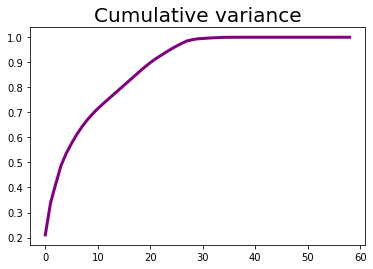

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(train_X)

plt.plot(pca.explained_variance_ratio_.cumsum(), lw=3, color='#800080')
plt.title('Cumulative variance', size=20)
plt.show()

In [ ]:
Loads = pd.DataFrame(
    data=pca.components_.T * np.sqrt(pca.explained_variance_), 
    columns=[f'PC{i}' for i in range(1, len(train_X.columns) + 1)],
    index=train_X.columns
)
Loads.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59
frame.encap_type,0.578801,-0.764988,-0.045251,-0.000898,-0.126671,-0.019406,-0.032558,0.067927,0.015527,0.000182,...,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
frame.len,-0.175662,-0.422687,0.123379,0.002097,0.577365,0.010360,0.032284,-0.409344,-0.096034,-0.045109,...,5.450408e-33,-1.822446e-32,-1.675082e-32,-4.447484e-32,-4.377499e-32,-7.592863e-34,-1.545012e-33,-2.050241e-33,-1.810702e-32,2.982154e-34
frame.number,-0.649721,0.697094,0.031466,-0.000175,0.044554,0.008045,0.005923,-0.016176,-0.001637,-0.001034,...,3.835872e-32,5.993968e-33,2.284570e-32,-2.581538e-32,-2.437075e-32,1.076638e-33,6.174520e-34,1.090418e-33,1.208291e-32,-1.700269e-32
frame.time_delta,0.154402,-0.010671,0.177144,0.004431,0.161815,-0.008200,0.941715,0.160795,-0.015979,0.006375,...,-1.607315e-17,1.138038e-17,-9.590296e-18,4.665757e-17,-3.480987e-17,8.927612e-33,-2.183722e-32,1.880811e-31,-1.015237e-17,-2.389437e-18
frame.time_delta_displayed,0.154402,-0.010671,0.177144,0.004431,0.161815,-0.008200,0.941715,0.160795,-0.015979,0.006375,...,1.607315e-17,-1.138038e-17,9.590296e-18,-4.665757e-17,3.480987e-17,-8.959774e-33,2.166661e-32,-1.881712e-31,1.015237e-17,2.389437e-18


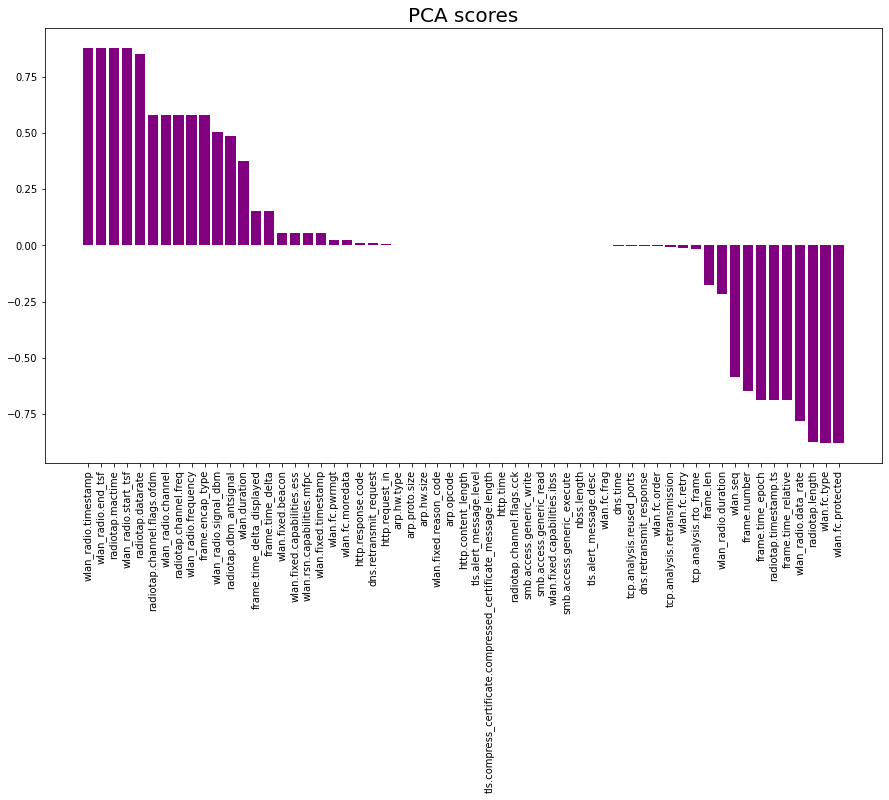

In [ ]:
pc1_Loads = Loads.sort_values(by='PC1', ascending=False)[['PC1']]
pc1_Loads = pc1_Loads.reset_index()
pc1_Loads.columns = ['Feature', 'CorrelationtoPC1']
plt.rcParams["figure.figsize"] = (15,8)
plt.bar(x=pc1_Loads['Feature'], height=pc1_Loads['CorrelationtoPC1'], color='#800080')
plt.title('PCA scores', size=20)
plt.xticks(rotation='vertical')
plt.show()